# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of Crypto Currency tweets</u></b>

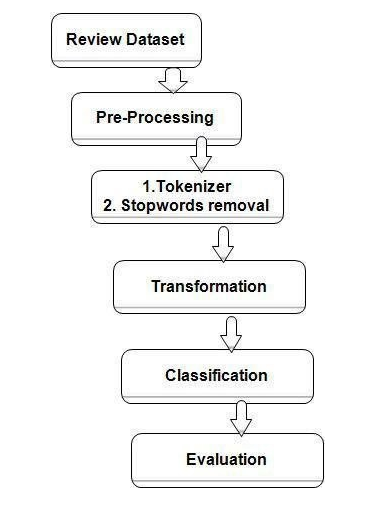

#**1.Lets Invite Some Libraries.**

In [1]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200) 
import string
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
from gensim.models.doc2vec import LabeledSentence
import gensim
from sklearn.linear_model import LogisticRegression
from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
working_dir_path = 'Data.csv'
df = pd.read_csv(working_dir_path,encoding = 'utf-8')
df=df.dropna(axis=0)
df

,Date,Tweet,Screen_name,Sentiment
0,Fri Mar 23 00:40:32 +0000 2018,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",myresumerocket,neutral
1,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @ProfFaustus (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy,BitMocro,neutral
2,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #blockchain and #Tipper. The #TipperEconomy can unseat Facebook and change everything! ICO Live No…,hojachotopur,positive
3,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,positive
4,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce that PayVX Presale Phase 1 is now LIVE!\n\nSign up --&gt;&gt; https://t.co/dhprzsSxek\nCurrencies accept…,aditzgraha,positive
...,...,...,...,...
50882,Fri Mar 23 08:55:16 +0000 2018,RT @fixy_app: Fixy Network brings popular cryptocurrencies and retailers as partners with benefits from blockchain. Partner Stores will acc…,quoting_lives,positive
50883,Fri Mar 23 08:55:17 +0000 2018,"RT @bethereumteam: After a successful launch of our Bounty campaign, we've managed to filter out the Bounty related questions to: https://t…",VariPewitt,positive
50884,Fri Mar 23 08:55:18 +0000 2018,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus Time is ending! https://t.co/HDvhoZrz2J, #ICO #cryptocurrency #mobile #app #mining #exercisin…",urbancoinerz,neutral
50885,Fri Mar 23 08:55:19 +0000 2018,I added a video to a @YouTube playlist https://t.co/ntFJrNvSvZ How To Bitcoin Cloud Mining Free For Lifetime Urdu / Hindi,MRDanishShahab,positive


# **2. Reviewing Our Dataset**

In [3]:
df.head()

,Date,Tweet,Screen_name,Sentiment
0,Fri Mar 23 00:40:32 +0000 2018,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",myresumerocket,neutral
1,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @ProfFaustus (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy,BitMocro,neutral
2,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #blockchain and #Tipper. The #TipperEconomy can unseat Facebook and change everything! ICO Live No…,hojachotopur,positive
3,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,positive
4,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce that PayVX Presale Phase 1 is now LIVE!\n\nSign up --&gt;&gt; https://t.co/dhprzsSxek\nCurrencies accept…,aditzgraha,positive


In [4]:
# There are null values in location column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50859 entries, 0 to 50886
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         50859 non-null  object
 1   Tweet        50859 non-null  object
 2   Screen_name  50859 non-null  object
 3   Sentiment    50859 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


In [5]:
# There 41157 rows and 6 columns in our database
df.shape

(50859, 4)

In [6]:
# Names Of columns in our dataset
df.columns

Index(['Date', 'Tweet', 'Screen_name', 'Sentiment'], dtype='object')

In [7]:
# All tweets came only from March
df.Date.value_counts()

Fri Mar 23 07:01:42 +0000 2018    20
Fri Mar 23 07:01:39 +0000 2018    18
Fri Mar 23 07:01:40 +0000 2018    15
Fri Mar 23 07:01:36 +0000 2018    15
Fri Mar 23 03:58:31 +0000 2018    14
                                  ..
Fri Mar 23 06:13:23 +0000 2018     1
Fri Mar 23 05:46:17 +0000 2018     1
Fri Mar 23 04:13:50 +0000 2018     1
Fri Mar 23 02:53:40 +0000 2018     1
Fri Mar 23 06:12:44 +0000 2018     1
Name: Date, Length: 23970, dtype: int64

In [8]:
# There are 5 unique sentiment types in our dataset
df['Sentiment'].value_counts()

positive    22937
neutral     21932
negative     5983
0               7
Name: Sentiment, dtype: int64

# Going deeper into tweet and sentiment.

In [9]:
df[df['Sentiment']=='negative']

,Date,Tweet,Screen_name,Sentiment
29,Fri Mar 23 00:40:55 +0000 2018,"RT @BUY_and_SELL5: Cryptocurrency Market Remains Stable at $350 Billion, Bitcoin at $9,000.\nOver the past 48 hours, after demonstrating a h…",elenatovpash,negative
33,Fri Mar 23 00:41:00 +0000 2018,Should we be crying out for standardisation and regulation of the digital currency Bitcoin? https://t.co/GtpynsyQV5 #tags,angheltwuit,negative
38,Fri Mar 23 00:41:02 +0000 2018,Bitcoin Loses $9k Support After Binance Confusion Shakes Confidence ... https://t.co/Wmtp4DwlZs,bitcoinslam,negative
41,Fri Mar 23 00:41:04 +0000 2018,1: Bitcoin average price is $8712.32 (-0.39% 1h)\n2: Ethereum average price is $538.523 (-0.43% 1h)\n3: Ripple averag… https://t.co/NrYWB93wMW,TickerTop,negative
57,Fri Mar 23 00:41:10 +0000 2018,RT @UPROXX: Twitter CEO Jack Dorsey predicts that #Bitcoin will be the world's ‘single currency’ within 10 years https://t.co/T8pf7BxDHx ht…,deadsnoopy,negative
...,...,...,...,...
50829,Fri Mar 23 08:54:51 +0000 2018,RT @PumaPay: Why Did Credit Cards Fail to Adopt to the Modern Needs? https://t.co/u1qB3gxA3T #pumapay #creditcards #banking #finance #block…,DaiferLoading,negative
50842,Fri Mar 23 08:55:00 +0000 2018,Bitcoin Will Be World's 'Single Currency' Says Twitter CEO https://t.co/f4hsEbLgkk https://t.co/P3fuHSLwkX,cryptpark,negative
50846,Fri Mar 23 08:55:03 +0000 2018,RT @CloudMiningX: Use the code: HF18BDAY30 at purchase to get a 30% discount for all contracts. The offer is limited. \n\n10 Ghs = 0.84$\n1000…,zoragraham5,negative
50865,Fri Mar 23 08:55:09 +0000 2018,Twitter CEO Says Bitcoin Will Be World’s ‘Single Currency’ Within A Decade https://t.co/2obg7hKwm5,devnullius,negative


In [10]:
df[df['Sentiment']=='neutral']

,Date,Tweet,Screen_name,Sentiment
0,Fri Mar 23 00:40:32 +0000 2018,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",myresumerocket,neutral
1,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @ProfFaustus (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy,BitMocro,neutral
7,Fri Mar 23 00:40:37 +0000 2018,One click to start mining cryptocurrencies together with &gt;45K people. #bitcoin https://t.co/rjZC2dia2S #PaaS #cloudnetwork,cloud_speaker,neutral
11,Fri Mar 23 00:40:40 +0000 2018,RT @livemarketcap: ICE Agency Charges Payza and Two Canadian Citizens With Bitcoin Money Laundering\n#Regulation #AML #arrests #Bitcoin #BTC…,NewsFeedDE,neutral
12,Fri Mar 23 00:40:41 +0000 2018,"RT @Vaultoro: We have all seen the HTTP protocol error 404 page not found, but did you know the developers of the protocol put in the error…",FinancialMinds_,neutral
...,...,...,...,...
50874,Fri Mar 23 08:55:14 +0000 2018,"Bitcoin: Mastering Bitcoin: Discover How I (An ex-army) Became A Crypto Millionaire in 6 Months Investing, and Trad… https://t.co/klUVwitgS0",CrabbyBiva,neutral
50876,Fri Mar 23 08:55:14 +0000 2018,"#Zhao #Dong #Recounts How He Lost 9,000 #BTC https://t.co/4SKP5bg77M #marketsandprices #9000 #bitcoin #china",BitNewsFlash,neutral
50879,Fri Mar 23 08:55:15 +0000 2018,Bitcoin Price Technical Analysis for 03/23/2018 – Another Reversal Pattern? https://t.co/NfAtDvmNDC,paleobyleo,neutral
50881,Fri Mar 23 08:55:16 +0000 2018,"RT @PhotoCoin_io: 2,000,000 PHT TOKEN #airdrop \n1. Follow \n2. Like\n3. Retweet ,tag 5 Friends with #PHT\n4. Comment your ETH address \nTotal s…",She062492,neutral


In [11]:
df[df['Sentiment']=='positive']

,Date,Tweet,Screen_name,Sentiment
2,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #blockchain and #Tipper. The #TipperEconomy can unseat Facebook and change everything! ICO Live No…,hojachotopur,positive
3,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,positive
4,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce that PayVX Presale Phase 1 is now LIVE!\n\nSign up --&gt;&gt; https://t.co/dhprzsSxek\nCurrencies accept…,aditzgraha,positive
5,Fri Mar 23 00:40:36 +0000 2018,"Copy successful traders automatically with Bitcoin! 💰💰\n\nI copy ""Dividend667"". Do you?\n\n➡️ https://t.co/qb2NXPknVt… https://t.co/Q43fKQRYzx",VictorS61164810,positive
6,Fri Mar 23 00:40:37 +0000 2018,RT @bethereumteam: We're revealing our surprise tomorrow! \nAre you ready to celebrate with us? 😮\n#surprise #presents #crypto #bitcoin #ethe…,ClarkKalel4,positive
...,...,...,...,...
50880,Fri Mar 23 08:55:15 +0000 2018,RT @coindesk: Coinbase Is In Talks to Buy One of Bitcoin's Best Funded Startups https://t.co/6ISLFSrZAr https://t.co/3uAhFkm1Qx,MarioGrbi1,positive
50882,Fri Mar 23 08:55:16 +0000 2018,RT @fixy_app: Fixy Network brings popular cryptocurrencies and retailers as partners with benefits from blockchain. Partner Stores will acc…,quoting_lives,positive
50883,Fri Mar 23 08:55:17 +0000 2018,"RT @bethereumteam: After a successful launch of our Bounty campaign, we've managed to filter out the Bounty related questions to: https://t…",VariPewitt,positive
50885,Fri Mar 23 08:55:19 +0000 2018,I added a video to a @YouTube playlist https://t.co/ntFJrNvSvZ How To Bitcoin Cloud Mining Free For Lifetime Urdu / Hindi,MRDanishShahab,positive


In [12]:
df[df['Sentiment']=='positive']

,Date,Tweet,Screen_name,Sentiment
2,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #blockchain and #Tipper. The #TipperEconomy can unseat Facebook and change everything! ICO Live No…,hojachotopur,positive
3,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,positive
4,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce that PayVX Presale Phase 1 is now LIVE!\n\nSign up --&gt;&gt; https://t.co/dhprzsSxek\nCurrencies accept…,aditzgraha,positive
5,Fri Mar 23 00:40:36 +0000 2018,"Copy successful traders automatically with Bitcoin! 💰💰\n\nI copy ""Dividend667"". Do you?\n\n➡️ https://t.co/qb2NXPknVt… https://t.co/Q43fKQRYzx",VictorS61164810,positive
6,Fri Mar 23 00:40:37 +0000 2018,RT @bethereumteam: We're revealing our surprise tomorrow! \nAre you ready to celebrate with us? 😮\n#surprise #presents #crypto #bitcoin #ethe…,ClarkKalel4,positive
...,...,...,...,...
50880,Fri Mar 23 08:55:15 +0000 2018,RT @coindesk: Coinbase Is In Talks to Buy One of Bitcoin's Best Funded Startups https://t.co/6ISLFSrZAr https://t.co/3uAhFkm1Qx,MarioGrbi1,positive
50882,Fri Mar 23 08:55:16 +0000 2018,RT @fixy_app: Fixy Network brings popular cryptocurrencies and retailers as partners with benefits from blockchain. Partner Stores will acc…,quoting_lives,positive
50883,Fri Mar 23 08:55:17 +0000 2018,"RT @bethereumteam: After a successful launch of our Bounty campaign, we've managed to filter out the Bounty related questions to: https://t…",VariPewitt,positive
50885,Fri Mar 23 08:55:19 +0000 2018,I added a video to a @YouTube playlist https://t.co/ntFJrNvSvZ How To Bitcoin Cloud Mining Free For Lifetime Urdu / Hindi,MRDanishShahab,positive


In [13]:
pd.isnull(df["Sentiment"])


0        False
1        False
2        False
3        False
4        False
         ...  
50882    False
50883    False
50884    False
50885    False
50886    False
Name: Sentiment, Length: 50859, dtype: bool

# Unique Values In Each Feature Coulmn

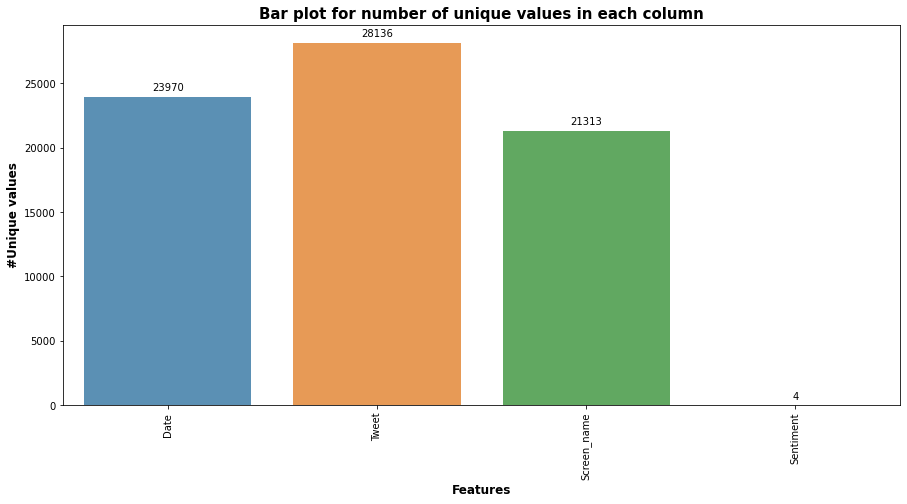

In [14]:
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

# Top 10 Screen_name of tweet

In [15]:
Top_names= df['Screen_name'].value_counts().head(10)

sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('white')

In [16]:
Top_names.head(10)

moneyblockchain    854
RandolphMlny       705
CoinsAirdrops      700
CyberDomain        467
CyberToolsBooks    459
CryptoDisrupt      249
cryptograbber      245
stone22stone       231
NewsFeedDE         128
Airdrop_er20       100
Name: Screen_name, dtype: int64

# Sentiments Countplot

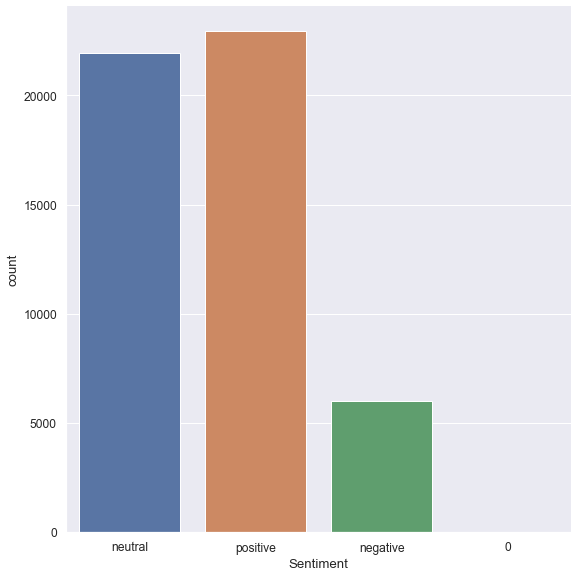

In [17]:
sns.set(font_scale=1.1)
sns.catplot("Sentiment", data=df, kind="count", height=8)

In [18]:
df.Date.value_counts()

Fri Mar 23 07:01:42 +0000 2018    20
Fri Mar 23 07:01:39 +0000 2018    18
Fri Mar 23 07:01:40 +0000 2018    15
Fri Mar 23 07:01:36 +0000 2018    15
Fri Mar 23 03:58:31 +0000 2018    14
                                  ..
Fri Mar 23 06:13:23 +0000 2018     1
Fri Mar 23 05:46:17 +0000 2018     1
Fri Mar 23 04:13:50 +0000 2018     1
Fri Mar 23 02:53:40 +0000 2018     1
Fri Mar 23 06:12:44 +0000 2018     1
Name: Date, Length: 23970, dtype: int64

# Data Preprocessing

**A) Removing @user**

In [19]:
# write function for removing @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [20]:
# create new column with removed @user
df['Clean_Tweet'] = np.vectorize(remove_pattern)(df['Tweet'], '@[\w]*')

In [21]:
df.head(2)

,Date,Tweet,Screen_name,Sentiment,Clean_Tweet
0,Fri Mar 23 00:40:32 +0000 2018,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",myresumerocket,neutral,"RT : Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…"
1,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @ProfFaustus (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy,BitMocro,neutral,But (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy


**REMOVED HTTP AND URLS FROM TWEET**

In [22]:
import re
df['Clean_Tweet'] = df['Clean_Tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [23]:
df.head(3)

,Date,Tweet,Screen_name,Sentiment,Clean_Tweet
0,Fri Mar 23 00:40:32 +0000 2018,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",myresumerocket,neutral,"RT : Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…"
1,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @ProfFaustus (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy,BitMocro,neutral,But (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂
2,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #blockchain and #Tipper. The #TipperEconomy can unseat Facebook and change everything! ICO Live No…,hojachotopur,positive,RT : Another use case for #blockchain and #Tipper. The #TipperEconomy can unseat Facebook and change everything! ICO Live No…


**B) Removing Punctuations, Numbers, and Special Characters**

In [24]:
# remove special characters, numbers, punctuations
df['Clean_Tweet'] = df['Clean_Tweet'].str.replace('[^a-zA-Z#]+',' ')
#df['Clean_Tweet'] = df['Clean_Tweet'].str.replace('#','')

In [25]:
df.head(5)

,Date,Tweet,Screen_name,Sentiment,Clean_Tweet
0,Fri Mar 23 00:40:32 +0000 2018,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",myresumerocket,neutral,RT Paul Krugman Nobel Luddite I had to tweak the nose of this Bitcoin enemy He says such foolish things Here s the link htt
1,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @ProfFaustus (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy,BitMocro,neutral,But dum b a ss said you know nothing about #Bitcoin
2,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #blockchain and #Tipper. The #TipperEconomy can unseat Facebook and change everything! ICO Live No…,hojachotopur,positive,RT Another use case for #blockchain and #Tipper The #TipperEconomy can unseat Facebook and change everything ICO Live No
3,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,positive,free coins
4,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce that PayVX Presale Phase 1 is now LIVE!\n\nSign up --&gt;&gt; https://t.co/dhprzsSxek\nCurrencies accept…,aditzgraha,positive,RT WE are happy to announce that PayVX Presale Phase is now LIVE Sign up gt gt


**C) Removing Short Words**

In [26]:
# remove short words
df['Clean_Tweet'] = df['Clean_Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [27]:
df.head(2)

,Date,Tweet,Screen_name,Sentiment,Clean_Tweet
0,Fri Mar 23 00:40:32 +0000 2018,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",myresumerocket,neutral,Paul Krugman Nobel Luddite had tweak the nose this Bitcoin enemy says such foolish things Here the link htt
1,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @ProfFaustus (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy,BitMocro,neutral,But dum said you know nothing about #Bitcoin


**D) Tokenization**

In [28]:
# create new variable tokenized tweet 
tokenized_tweet = df['Clean_Tweet'].apply(lambda x: x.split())

In [29]:
df.head(2)

,Date,Tweet,Screen_name,Sentiment,Clean_Tweet
0,Fri Mar 23 00:40:32 +0000 2018,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",myresumerocket,neutral,Paul Krugman Nobel Luddite had tweak the nose this Bitcoin enemy says such foolish things Here the link htt
1,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @ProfFaustus (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy,BitMocro,neutral,But dum said you know nothing about #Bitcoin


**E) Stemming**

In [30]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
#print(len(tokenized_tweet))
#print(tokenized_tweet)

In [31]:
df.head(2)

,Date,Tweet,Screen_name,Sentiment,Clean_Tweet
0,Fri Mar 23 00:40:32 +0000 2018,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",myresumerocket,neutral,Paul Krugman Nobel Luddite had tweak the nose this Bitcoin enemy says such foolish things Here the link htt
1,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @ProfFaustus (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy,BitMocro,neutral,But dum said you know nothing about #Bitcoin


In [32]:
# join tokens into one sentence
for i in range(len(tokenized_tweet)):
    try:
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    except:
        pass
# change df['Tweet'] to tokenized_tweet
#print(tokenized_tweet)

In [33]:
df['Clean_Tweet']  = tokenized_tweet


In [34]:
df.head(2)

,Date,Tweet,Screen_name,Sentiment,Clean_Tweet
0,Fri Mar 23 00:40:32 +0000 2018,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",myresumerocket,neutral,paul krugman nobel luddit had tweak the nose thi bitcoin enemi say such foolish thing here the link htt
1,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @ProfFaustus (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy,BitMocro,neutral,but dum said you know noth about #bitcoin


A) **Understanding the common words used in the tweets: WordCloud**

In [35]:
df.head(2)

,Date,Tweet,Screen_name,Sentiment,Clean_Tweet
0,Fri Mar 23 00:40:32 +0000 2018,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",myresumerocket,neutral,paul krugman nobel luddit had tweak the nose thi bitcoin enemi say such foolish thing here the link htt
1,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @ProfFaustus (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy,BitMocro,neutral,but dum said you know noth about #bitcoin


**D) Understanding the impact of Hashtags on tweets sentiment**

In [36]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags

In [37]:
# extracting hashtags from non racist/sexist tweets
HT_Positive = hashtag_extract(df['Tweet'][df['Sentiment'] == 'positive'])
HT_Neutral = hashtag_extract(df['Tweet'][df['Sentiment'] == 'neutral'])
HT_Negative = hashtag_extract(df['Tweet'][df['Sentiment'] == 'negative'])



# unnesting list
HT_Positive = sum(HT_Positive, [])
HT_Neutral = sum(HT_Neutral, [])
HT_Negative = sum(HT_Negative,[])


In [38]:
print(HT_Positive)

['blockchain', 'Tipper', 'TipperEconomy', 'surprise', 'presents', 'crypto', 'bitcoin', 'ethe', 'Breaking', 'SteveRichFXCorp', 'News', 'milestone', 'tron', 'bitcoin', 'trader', 'trading', 'Bitcoin', 'Satoshi', 'Earn_Money', 'cryptocurrency', 'blockchain', 'Airdrop', 'Hubtrex', 'Hubtrex', 'Bitcoin', 'Satoshi', 'Earn_Money', 'cryptocurrency', 'blockchain', 'Airdrop', 'Redcoin', 'Redcoin', 'Bethereum', 'blo', 'bitcoin', 'Donation', 'IoT', 'InternetOfThings', 'IIoT', 'IndustrialI', 'Bitcoin', 'Satoshi', 'Earn_Money', 'cryptocurrency', 'blockchain', 'Airdrop', 'Hubtrex', 'Hubtrex', 'Trading', 'Bitcoin', 'Russia', 'xyonetwork', 'ICO', 'Crowdsale', 'Bitcoin', 'Blockchain', 'Token', 'ETH', 'betting', 'socialbetting', 'onl', 'worldrecord', 'bitcoin', '24ho', 'Bitcoin', 'Ethereum', 'Blockchain', 'Trading', 'Bethereum', 'BitcoinCash', 'Bitcoin', 'milestone', 'Bitcoin', 'trading', 'bitcoin', 'free', 'litecoin', 'tradebitcoin', 'Bethereum', 'blo', 'blockchain', 'Tipper', 'TipperEconomy', 'AIRDROP', 

In [39]:
print(HT_Neutral)

['Bitcoin', 'bitcoin', 'PaaS', 'cloudnetwork', 'Regulation', 'AML', 'arrests', 'Bitcoin', 'BTC', 'Cryptocurrency', 'Crypto', 'Bitcoin', 'Btc', 'PureCryptoNews', 'AIRDROP', 'coinbase', 'ethereum', 'SmartContracts', 'BugBo', 'bitcoin', 'bitcointalk', 'ANN', 'Gymrewards', 'tokenssale', 'ethereum', 'bitcoin', 'Ihavetobepartofthis', 'airdrop', 'b', 'cr', 'RamenCoin', 'airdrop', 'bounty', 'ICO', 'ethereum', 'bitcoin', 'bitcoi', 'Bethereum', 'LightningNetwork', 'Bitcoin', 'bitcoin', 'bitcointalk', 'ANN', 'Gymrewards', 'tokenssale', 'ethereum', 'bitcoi', 'crypto', 'cryptonews', 'bitcoin', 'birthday', 'celebrate', 'Bitcoin', 'celebrate', 'Vergecurrency', 'freedom', 'privacy', 'indictments', 'Cybersecurity', 'Bitcoin', 'Cybersecurity', 'Bitcoin', 'Cybersecurity', 'Bitcoin', 'Celebration', 'crypto', 'indictments', 'crypto', 'altcoin', 'cryptocurrency', 'bitcoin', 'ethereum', 'Giveaway', 'Cybersecurity', 'Bitcoin', 'Giveaway', 'BTC', 'bitcoin', 'litecoin', 'ltc', 'ripple', 'x', 'Crypto', 'Cybersec

In [40]:
print(HT_Negative)

['tags', 'Bitcoin', 'Bitcoin', 'BTC', 'BITCOIN', 'ETH', 'ETHEREUM', 'Bitcoin', 'Giveaway', 'Ethereum', 'TechnicalAnalysis', 'crypto', 'btc', 'Cybersecurity', 'Bitcoin', 'cryptocurrency', 'investment', 'investing', 'crypt', 'bitcoin', 'bitcoin', 'ethereum', 'bitcoinprice', 'cryptocurrency', 'Airdrop', 'Giveaway', 'Ethereum', 'Bitcoin', 'crypto', 'blockchain', 'Airdrop', 'Ether', 'Game', 'EtherEst', 'bitcoin', 'Giveaway', 'Ethereum', 'Giveaway', 'Ethereum', 'Cybersecurity', 'Bitcoin', 'Cybersecurity', 'Bitcoin', 'Ethereum', 'blockchain', 'bitcoin', 'Airdrop', 'Airdrop', 'Giveaway', 'Ethereum', 'CryptocurrencyNews', 'Binance', 'Bitcoin', 'cryptocurrency', 'Airdrop', 'Tron', 'TRX', 'Cybersecurity', 'Bitcoin', 'Ethereum', 'blockchain', 'bitcoin', 'bitcoin', 'Airdrop', 'bitcoin', 'alphainves', 'Bitcoin', 'crypto', 'blockchain', 'Airdrop', 'Ether', 'Game', 'EtherEs', 'Giveaway', 'Ethereum', 'jack', 'dorsey', 'crypto', 'Giveaway', 'Ethereum', 'Bitcoin', '1', 'Giveaway', 'Ethereum', 'Close', 'C

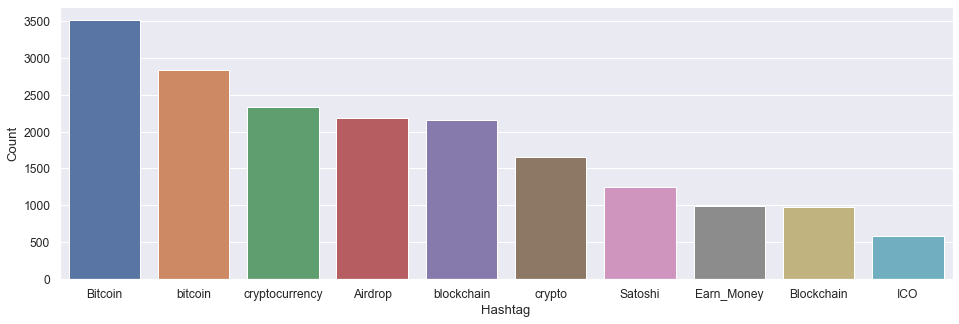

In [41]:
# making frequency distribution top 10 Extremely Positive hashtags
a = nltk.FreqDist(HT_Positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

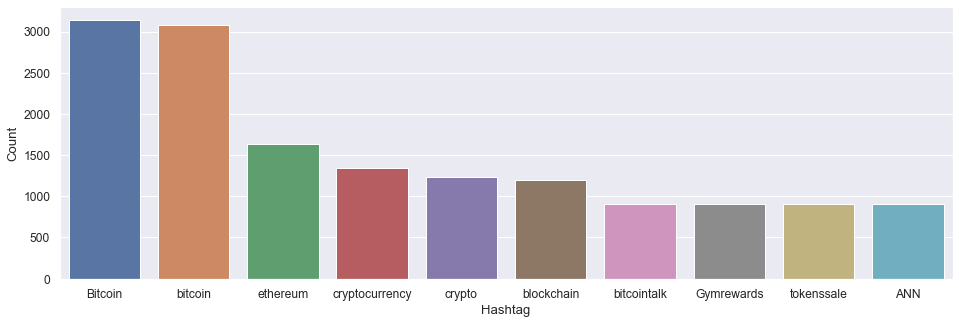

In [42]:
# making frequency distribution top 10 Positive hashtags
a = nltk.FreqDist(HT_Neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

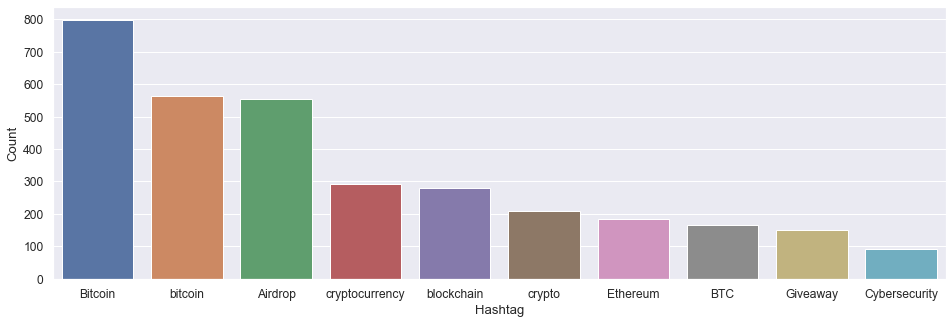

In [43]:
# making frequency distribution top 10 Positive hashtags
a = nltk.FreqDist(HT_Negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

#**4. Extracting Features from Cleaned Tweets**

In [44]:
new_df = df[['Clean_Tweet','Sentiment']]

In [45]:
new_df.head()

,Clean_Tweet,Sentiment
0,paul krugman nobel luddit had tweak the nose thi bitcoin enemi say such foolish thing here the link htt,neutral
1,but dum said you know noth about #bitcoin,neutral
2,anoth use case for #blockchain and #tipper the #tippereconomi can unseat facebook and chang everyth ico live,positive
3,free coin,positive
4,are happi announc that payvx presal phase now live sign,positive


In [46]:
df['Sentiment'].value_counts()

positive    22937
neutral     21932
negative     5983
0               7
Name: Sentiment, dtype: int64

**Converting into lower case**

In [47]:
#new_df["Clean_Tweet"] = new_df["Clean_Tweet"].str.lower()#.str.split()

In [48]:
#new_df.head(5)

**Removing Stopwords**

In [49]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mursa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [51]:
new_df['Clean_Tweet'].apply(lambda x: [item for item in x if item not in stop])

0         [p, u, l,  , k, r, u, g, n,  , n, b, e, l,  , l, u,  , h,  , w, e, k,  , h, e,  , n, e,  , h,  , b, c, n,  , e, n, e,  ,  , u, c, h,  , f, l, h,  , h, n, g,  , h, e, r, e,  , h, e,  , l, n, k,  , h]
1                                                                                                                                             [b, u,  , u,  ,  , u,  , k, n, w,  , n, h,  , b, u,  , #, b, c, n]
2        [n, h,  , u, e,  , c, e,  , f, r,  , #, b, l, c, k, c, h, n,  , n,  , #, p, p, e, r,  , h, e,  , #, p, p, e, r, e, c, n,  , c, n,  , u, n, e,  , f, c, e, b, k,  , n,  , c, h, n, g,  , e, v, e, r, ...
3                                                                                                                                                                                          [f, r, e, e,  , c, n]
4                                                                                                [r, e,  , h, p, p,  , n, n, u, n, c,  , h,  , p, v, x,  , p, r, e, 

In [52]:
new_df.head(6)

,Clean_Tweet,Sentiment
0,paul krugman nobel luddit had tweak the nose thi bitcoin enemi say such foolish thing here the link htt,neutral
1,but dum said you know noth about #bitcoin,neutral
2,anoth use case for #blockchain and #tipper the #tippereconomi can unseat facebook and chang everyth ico live,positive
3,free coin,positive
4,are happi announc that payvx presal phase now live sign,positive
5,copi success trader automat with bitcoin copi dividend you,positive


In [53]:
new_df.shape

(50859, 2)

In [54]:
new_df.isnull().sum()

Clean_Tweet    0
Sentiment      0
dtype: int64

In [55]:

new_df['Clean_Tweet'] = df.Clean_Tweet.apply(lambda x: ''.join([str(i) for i in x]))
new_df.head(20)

,Clean_Tweet,Sentiment
0,paul krugman nobel luddit had tweak the nose thi bitcoin enemi say such foolish thing here the link htt,neutral
1,but dum said you know noth about #bitcoin,neutral
2,anoth use case for #blockchain and #tipper the #tippereconomi can unseat facebook and chang everyth ico live,positive
3,free coin,positive
4,are happi announc that payvx presal phase now live sign,positive
5,copi success trader automat with bitcoin copi dividend you,positive
6,reveal our surpris tomorrow are you readi celebr with #surpris #present #crypto #bitcoin #eth,positive
7,one click start mine cryptocurr togeth with peopl #bitcoin,neutral
8,first speaker how can get bitcoin the greatest cash the world medium exchang not meant,positive
9,bitcoin wasn built live exchang,positive


# Spitting Our Dataset into Training And Testing Dataset ( For Multiclass Classification)

In [56]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(new_df,test_size = 0.2,random_state=0,stratify = new_df.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (40687, 2)
valid shape :  (10172, 2)


In [57]:
train

,Clean_Tweet,Sentiment
2859,get for free regist binanc trade fee and fee for deposit get bonu here,positive
7188,fact fiction #altcoinhustl #bitcoin #bitcoinnew #altcoin,neutral
6118,today celebr our #birthday click the articl find out what do #celebr,neutral
12955,neolit #airdrop follow retweet amp tag peopl comment your erc address suppli token symbol nlt,neutral
40613,check thi tehnic video and amaz how thi technolog work,neutral
...,...,...
46389,mailiya pack pcie dual chip pci power riser adapt card usb extens cabl amp pin,neutral
16252,enjoy thi masterpiec #bitconnect #bitcoin #cryptocurr,positive
49420,,neutral
48885,break rockin rod rosenstein make major cyber law enforc announc tomorrow treasuri undersecret,positive


# Use Of Counter Vectorizer For Multi Class Classification

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train['Clean_Tweet'])
X_valid = vectorizer.transform(valid['Clean_Tweet'])

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (40687, 10781)
X_train.shape :  (10172, 10781)
y_train.shape :  (40687,)
y_valid.shape :  (10172,)


# Naive Bayes Classifier for MULTICLASS Classification

In [59]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.8667141838916608
Validation accuracy Score :  0.8428037750688163
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
    negative       0.79      0.82      0.80      1163
     neutral       0.80      0.88      0.84      3992
    positive       0.90      0.82      0.86      5015

    accuracy                           0.84     10172
   macro avg       0.62      0.63      0.62     10172
weighted avg       0.85      0.84      0.84     10172



# Stochastic Gradient Descent-SGD Classifier( MULTICLASS CLASSIFICATION)

In [60]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.95983975225502
Validation accuracy Score :  0.9415060951631931
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
    negative       0.85      0.95      0.90      1063
     neutral       0.97      0.92      0.94      4631
    positive       0.94      0.96      0.95      4477

    accuracy                           0.94     10172
   macro avg       0.94      0.96      0.95     10172
weighted avg       0.94      0.94      0.94     10172



# RANDOM FOREST CLASSIFIER (For Multiclass Classification)

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  0.99215965787598
Validation accuracy Score :  0.9522217852929611
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
    negative       0.86      0.99      0.92      1037
     neutral       0.98      0.93      0.95      4634
    positive       0.95      0.97      0.96      4500

    accuracy                           0.95     10172
   macro avg       0.95      0.97      0.96     10172
weighted avg       0.95      0.95      0.95     10172



# Extreme Gradient Boosting ( For Multiclass Classification)

In [62]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_valid))

[23:16:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy Score    :  0.9171479833853565
Validation accuracy Score :  0.9138812426268187
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
    negative       0.75      0.98      0.85       922
     neutral       0.98      0.86      0.92      5002
    positive       0.89      0.96      0.93      4247

    accuracy                           0.91     10172
   macro avg       0.91      0.95      0.92     10172
weighted avg       0.92      0.91      0.91     10172



# Support vector machine( For Multiclass Classification)

In [63]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.9742915427532135
Validation accuracy Score :  0.9453401494298073
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
    negative       0.83      0.99      0.90      1005
     neutral       0.98      0.92      0.95      4695
    positive       0.94      0.97      0.95      4471

    accuracy                           0.95     10172
   macro avg       0.94      0.97      0.95     10172
weighted avg       0.95      0.95      0.95     10172



# CATBOOST MODEL (For Multiclass Classification)

In [64]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [65]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

In [66]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,  
        eval_set=(X_valid, y_valid), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


In [67]:
catboost_prediction = clf2.predict(X_valid)
catboost_accuracy = accuracy_score(y_valid,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_valid))

Training accuracy Score    :  0.9259714405092536
Validation accuracy Score :  0.9240070782540307
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
    negative       0.78      0.97      0.86       958
     neutral       0.97      0.88      0.93      4850
    positive       0.91      0.96      0.94      4363

    accuracy                           0.92     10172
   macro avg       0.92      0.95      0.93     10172
weighted avg       0.93      0.92      0.92     10172



# All the multiclass models test accuracy in descending order

In [68]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'],
    'Test accuracy': [svc_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy,catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
1,Random Forest,0.952222
0,Support Vector Machines,0.945340
3,Stochastic Gradient Decent,0.941506
5,CatBoost,0.924007
4,XGBoost,0.913881
2,Naive Bayes,0.842804
